## import stuff

In [36]:
#importing things
import pandas as pd
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import sem
from scipy.stats import ttest_ind_from_stats
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from collections import OrderedDict
import seaborn as sns

## fetch the data

In [53]:
#h1
h1a = pd.DataFrame(pd.read_csv('6261a_results/6261a_kd_meanbin_err.csv',delimiter=',',names=['variant', 'logKd','A','B','r2','sigma','c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12'],dtype={'variant': str}))
h1b = pd.DataFrame(pd.read_csv('6261b_results/6261b_kd_meanbin_err.csv',delimiter=',',names=['variant', 'logKd','A','B','r2','sigma','c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12'],dtype={'variant': str}))
h1c = pd.DataFrame(pd.read_csv('6261c_results/6261c_kd_meanbin_err.csv',delimiter=',',names=['variant', 'logKd','A','B','r2','sigma','c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12'],dtype={'variant': str}))
#h1
h9x = pd.DataFrame(pd.read_csv('6261x_results/6261x_kd_meanbin_err.csv',delimiter=',',names=['variant', 'logKd','A','B','r2','sigma','c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12'],dtype={'variant': str}))
h9y = pd.DataFrame(pd.read_csv('6261y_results/6261y_kd_meanbin_err.csv',delimiter=',',names=['variant', 'logKd','A','B','r2','sigma','c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12'],dtype={'variant': str}))
h9z = pd.DataFrame(pd.read_csv('6261z_results/6261z_kd_meanbin_err.csv',delimiter=',',names=['variant', 'logKd','A','B','r2','sigma','c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12'],dtype={'variant': str}))

In [54]:
#merge by antigen
#H1
h1_all = pd.DataFrame()
h1_all = pd.merge(h1a, h1b, on='variant',how='outer')
h1_all = pd.merge(h1_all, h1c, on='variant',how='outer')
#H9
h9_all = pd.DataFrame()
h9_all = pd.merge(h9x, h9y, on='variant',how='outer')
h9_all = pd.merge(h9_all, h9z, on='variant',how='outer')
print(h1_all.shape[0],h9_all.shape[0])

2034 2019


## save these files

In [55]:
h1_all.to_csv('kd_processed/20210323_h1_all.csv', index=False)
h9_all.to_csv('kd_processed/20210323_h9_all.csv', index=False)

## filtering & merging

In [56]:
#replacing things below the boundary with the boundary & then filtering out all poor fits
h1a_filt = h1a.copy()
column_name = "logKd"
new_value = 7
boolean_condition = (h1a_filt.logKd < 7)
h1a_filt.loc[boolean_condition, column_name] = new_value
print(h1a['logKd'].mean(),h1a_filt['logKd'].mean())
h1a_filt_out = h1a_filt.loc[((h1a_filt['logKd'] > 7) & (h1a_filt['sigma'] <= 1) & (h1a_filt['r2'] >= 0.8))|(h1a_filt['logKd'] <= 7)]
h1a_filt_out.shape[0]

8.730677069520482 8.77409365358053


1871

In [57]:
#replacing things below the boundary with the boundary
h1b_filt = h1b.copy()
column_name = "logKd"
new_value = 7
boolean_condition = (h1b_filt.logKd < 7)
h1b_filt.loc[boolean_condition, column_name] = new_value
print(h1b['logKd'].mean(),h1b_filt['logKd'].mean())
h1b_filt_out = h1b_filt.loc[((h1b_filt['logKd'] > 7) & (h1b_filt['sigma'] <= 1) & (h1b_filt['r2'] >= 0.8))|(h1b_filt['logKd'] <= 7)]
h1b_filt_out.shape[0]

8.8416312013062 8.89176874605345


1834

In [58]:
#replacing things below the boundary with the boundary
h1c_filt = h1c.copy()
column_name = "logKd"
new_value = 7
boolean_condition = (h1c_filt.logKd < 7)
h1c_filt.loc[boolean_condition, column_name] = new_value
print(h1c['logKd'].mean(),h1c_filt['logKd'].mean())
h1c_filt_out = h1c_filt.loc[((h1c_filt['logKd'] > 7) & (h1c_filt['sigma'] <= 1) & (h1c_filt['r2'] >= 0.8))|(h1c_filt['logKd'] <= 7)]
h1c_filt_out.shape[0]

8.753055121884833 8.788378188560376


1772

In [59]:
#replacing things below the boundary with the boundary & then filtering out all poor fits
h9x_filt = h9x.copy()
column_name = "logKd"
new_value = 7
boolean_condition = (h9x_filt.logKd < 7)
h9x_filt.loc[boolean_condition, column_name] = new_value
print(h9x['logKd'].mean(),h9x_filt['logKd'].mean())
h9x_filt_out = h9x_filt.loc[((h9x_filt['logKd'] > 7) & (h9x_filt['sigma'] <= 1) & (h9x_filt['r2'] >= 0.8))|(h9x_filt['logKd'] <= 7)]
h9x_filt_out.shape[0]

8.579238779763346 8.617125520875137


1717

In [60]:
#replacing things below the boundary with the boundary & then filtering out all poor fits
h9y_filt = h9y.copy()
column_name = "logKd"
new_value = 7
boolean_condition = (h9y_filt.logKd < 7)
h9y_filt.loc[boolean_condition, column_name] = new_value
print(h9y['logKd'].mean(),h9y_filt['logKd'].mean())
h9y_filt_out = h9y_filt.loc[((h9y_filt['logKd'] > 7) & (h9y_filt['sigma'] <= 1) & (h9y_filt['r2'] >= 0.8))|(h9y_filt['logKd'] <= 7)]
h9y_filt_out.shape[0]

8.780150467584381 8.814459712484545


1602

In [61]:
#replacing things below the boundary with the boundary & then filtering out all poor fits
h9z_filt = h9z.copy()
column_name = "logKd"
new_value = 7
boolean_condition = (h9z_filt.logKd < 7)
h9z_filt.loc[boolean_condition, column_name] = new_value
print(h9z['logKd'].mean(),h9z_filt['logKd'].mean())
h9z_filt_out = h9z_filt.loc[((h9z_filt['logKd'] > 7) & (h9z_filt['sigma'] <= 1) & (h9z_filt['r2'] >= 0.8))|(h9z_filt['logKd'] <= 7)]
h9z_filt_out.shape[0]

8.629985846076092 8.716081905656482


1628

In [62]:
#merging
h1_filt_merg = pd.DataFrame()
h1_filt_merg = pd.merge(h1a_filt_out, h1b_filt_out, on='variant',how='outer')
h1_filt_merg = pd.merge(h1_filt_merg, h1c_filt_out, on='variant',how='outer')
h1_filt_merg_sm = h1_filt_merg[['variant','logKd_x','logKd_y','logKd']].copy()
h1_filt_merg_sm['mean'] = h1_filt_merg_sm.mean(axis=1)
h1_filt_merg_sm['sem'] = h1_filt_merg_sm.sem(axis=1)
h1_filt_merg_sm.rename(columns={"logKd_x": "repa", "logKd_y": "repb", "logKd": "repc","mean": "h1_mean", "sem": "h1_sem"},inplace=True)
h1_filt_merg_sm

,variant,repa,repb,repc,h1_mean,h1_sem
0,01010100111,9.430292,9.471053,9.432669,9.444671,0.009340
1,01011110011,9.404493,9.442880,9.440280,9.429218,0.008758
2,01010100101,9.064914,9.184359,9.047794,9.099022,0.030373
3,01000100110,9.320260,9.346942,9.301644,9.322949,0.009295
4,01001100010,8.449593,8.846446,8.540014,8.612018,0.084913
...,...,...,...,...,...,...
1882,01100010001,NaN,9.624301,NaN,9.624301,0.000000
1883,00000001110,NaN,NaN,7.000000,7.000000,0.000000
1884,01100000000,NaN,NaN,7.000000,7.000000,0.000000
1885,00111101001,NaN,NaN,7.000000,7.000000,0.000000


In [63]:
#merging
h9_filt_merg = pd.DataFrame()
h9_filt_merg = pd.merge(h9x_filt_out, h9y_filt_out, on='variant',how='outer')
h9_filt_merg = pd.merge(h9_filt_merg, h9z_filt_out, on='variant',how='outer')
h9_filt_merg_sm = h9_filt_merg[['variant','logKd_x','logKd_y','logKd']].copy()
h9_filt_merg_sm['mean'] = h9_filt_merg_sm.mean(axis=1)
h9_filt_merg_sm['sem'] = h9_filt_merg_sm.sem(axis=1)
h9_filt_merg_sm.rename(columns={"logKd_x": "repx", "logKd_y": "repy", "logKd": "repz","mean": "h9_mean", "sem": "h9_sem"},inplace=True)
h9_filt_merg_sm

,variant,repx,repy,repz,h9_mean,h9_sem
0,00011001100,7.0,7.0,7.0,7.0,0.0
1,10000001100,7.0,7.0,7.0,7.0,0.0
2,00001011100,7.0,NaN,7.0,7.0,0.0
3,00000001101,7.0,7.0,7.0,7.0,0.0
4,00100001101,7.0,7.0,7.0,7.0,0.0
...,...,...,...,...,...,...
1837,10000001101,NaN,NaN,7.0,7.0,0.0
1838,01101010000,NaN,NaN,7.0,7.0,0.0
1839,00101110101,NaN,NaN,7.0,7.0,0.0
1840,00111010000,NaN,NaN,7.0,7.0,0.0


## adjusting, filtering & merging

### H1

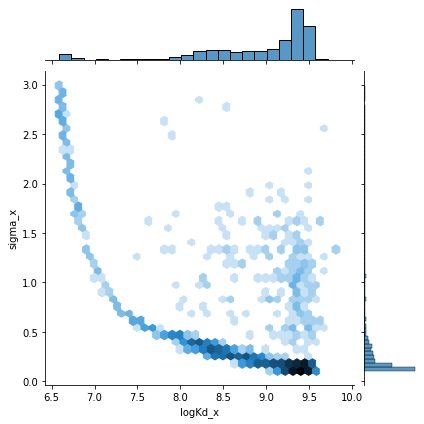

In [64]:
#H1 rep1
from scipy.stats import pearsonr
h1_all_test = h1_all[['logKd_x', 'sigma_x']].copy()
h1_all_test.dropna(inplace=True)
h1_filt_test = h1_all_test.loc[(h1_all_test['sigma_x'] <= 3)]
fig1=sns.jointplot(x='logKd_x', y='sigma_x', data=h1_filt_test, kind='hex', bins='log')

In [65]:
h1a_adj = h1a.copy()
boolean_condition = (h1a_adj.logKd < 8) & (h1a_adj.sigma > 1)
column_name = "logKd"
new_value = 7
h1a_adj.loc[boolean_condition, column_name] = new_value
boolean_condition = (h1a_adj.logKd < 7)
h1a_adj.loc[boolean_condition, column_name] = new_value
print(h1a['logKd'].mean(),h1a_adj['logKd'].mean())
h1a_adj

8.730677069520482 8.770243034270365


,variant,logKd,A,B,r2,sigma,c1,c2,c3,c4,...,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,01010100111,9.430292,7973.643995,126.477890,0.996464,0.112316,3.921994,3.900830,3.894349,3.826724,...,0.127577,0.124818,0.121863,0.120815,0.088753,0.084452,0.116571,0.175589,0.166724,0.151225
1,01011110011,9.404493,9093.648484,119.911437,0.994894,0.107711,3.990761,3.947351,3.941244,3.850347,...,0.123764,0.122653,0.122366,0.115211,0.089642,0.079899,0.128462,0.181084,0.169542,0.151476
2,01010100101,9.064914,4190.480954,140.096739,0.992926,0.160647,3.702715,3.605547,3.622152,3.432519,...,0.136997,0.138787,0.154650,0.140368,0.106872,0.129891,0.180276,0.182317,0.169580,0.152798
3,01000100110,9.320260,6032.868392,131.443068,0.996451,0.126341,3.784176,3.809467,3.794822,3.664262,...,0.131089,0.126059,0.127803,0.119729,0.092909,0.094469,0.156701,0.180557,0.170531,0.154394
4,01001100010,8.449593,2171.369103,153.109988,0.991204,0.272799,3.383619,3.295613,3.267411,2.970811,...,0.177191,0.157405,0.164358,0.172142,0.157740,0.185726,0.188653,0.181779,0.170833,0.154168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,10011110100,9.211979,11035.794174,137.439264,0.939689,1.586408,3.756446,4.060942,4.133645,4.276400,...,1.476341,2.473763,1.881177,1.640173,1.457967,1.789914,1.148536,1.383590,0.986583,1.232687
2019,01010110111,9.137208,11793.034382,133.458534,0.975901,1.684550,4.221713,3.821433,4.064616,4.276400,...,1.676985,2.473763,3.834228,2.074890,1.830523,1.221427,1.286801,1.566175,1.547029,1.069994
2020,00110010010,8.518288,1281.159884,144.102484,0.809496,1.741628,3.441048,2.948278,3.485172,2.473462,...,1.752189,1.261956,0.902642,0.965827,0.618758,0.638064,1.129530,1.566175,0.786357,0.721459
2021,00001110100,7.000000,66056.784082,189.529884,0.643008,40.770887,3.810441,3.325160,3.157763,2.473462,...,3.172795,1.261956,1.471047,2.477181,2.194610,1.196941,1.129530,1.566175,1.266664,1.506246


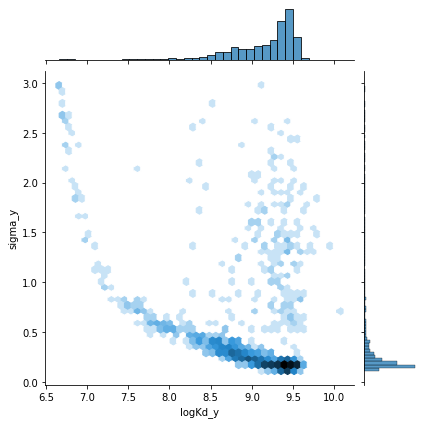

In [66]:
#H1 rep2
from scipy.stats import pearsonr
h1_all_test = h1_all[['logKd_y', 'sigma_y']].copy()
h1_all_test.dropna(inplace=True)
h1_filt_test = h1_all_test.loc[(h1_all_test['sigma_y'] <= 3)]
fig1=sns.jointplot(x='logKd_y', y='sigma_y', data=h1_filt_test, kind='hex', bins='log')

In [67]:
h1b_adj = h1b.copy()
boolean_condition = (h1b_adj.logKd < 8) & (h1b_adj.sigma > 1)
column_name = "logKd"
new_value = 7
h1b_adj.loc[boolean_condition, column_name] = new_value
boolean_condition = (h1b_adj.logKd < 7)
h1b_adj.loc[boolean_condition, column_name] = new_value
print(h1b['logKd'].mean(),h1b_adj['logKd'].mean())
h1b_adj

8.8416312013062 8.890867097900198


,variant,logKd,A,B,r2,sigma,c1,c2,c3,c4,...,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,01010100011,9.171278,4356.040495,259.710757,0.994297,0.169594,3.679423,3.682520,3.524578,3.622101,...,0.162576,0.153014,0.705660,0.152143,0.086660,0.092880,0.132062,0.166913,0.144792,0.114215
1,01010100101,9.184359,5734.834307,261.742039,0.995003,0.143544,3.803250,3.775046,3.662374,3.742805,...,0.134188,0.134780,0.748623,0.144675,0.083596,0.079050,0.126928,0.154788,0.146246,0.113547
2,10000100101,9.026099,7195.292270,250.734332,0.990427,0.164783,3.891861,3.820418,3.820936,3.780790,...,0.138513,0.155027,0.804705,0.156561,0.104416,0.097397,0.137740,0.171632,0.149324,0.121162
3,01110100101,9.228281,5315.312901,257.046785,0.996151,0.151017,3.789604,3.731377,3.642949,3.703617,...,0.144916,0.144099,0.800855,0.163085,0.086581,0.081786,0.125480,0.173809,0.146781,0.114751
4,01010011101,9.475336,4472.030509,247.548003,0.998231,0.155464,3.703035,3.647064,3.643585,3.616024,...,0.157531,0.170706,0.860049,0.160900,0.089692,0.079986,0.128967,0.160721,0.148073,0.117716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,11100010011,9.490971,8681.292868,241.486358,0.827456,2.217490,3.964353,4.036545,3.476188,4.366822,...,2.040588,3.091426,3.058464,3.123810,2.122515,2.059351,1.507061,2.459246,0.781125,0.805496
1980,10000110110,9.400611,11941.578535,245.250251,0.904676,1.712607,3.964353,4.064768,4.080067,4.145699,...,1.827545,2.527844,3.058464,3.123810,1.600650,0.979532,1.367429,2.095490,1.222706,1.372637
1981,01111110111,9.375568,16033.167147,251.314755,0.971261,1.891478,4.199469,4.064768,4.343341,4.020501,...,2.512170,2.408216,1.937964,1.979027,1.902052,1.452925,1.382426,2.095490,1.266362,1.202216
1982,11011010010,9.509089,12448.277873,241.920700,0.946669,1.372150,4.108126,3.800062,4.159481,4.020501,...,1.125243,2.408216,1.823825,2.046719,1.245042,1.289228,1.324190,1.741213,0.561431,0.805496


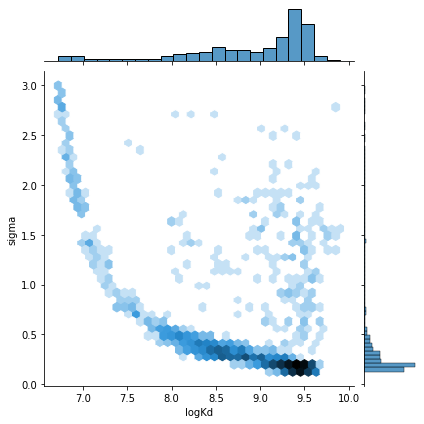

In [68]:
#H1 rep3
from scipy.stats import pearsonr
h1_all_test = h1_all[['logKd', 'sigma']].copy()
h1_all_test.dropna(inplace=True)
h1_filt_test = h1_all_test.loc[(h1_all_test['sigma'] <= 3)]
fig1=sns.jointplot(x='logKd', y='sigma', data=h1_filt_test, kind='hex', bins='log')

In [69]:
h1c_adj = h1c.copy()
boolean_condition = (h1c_adj.logKd < 8) & (h1c_adj.sigma > 1)
column_name = "logKd"
new_value = 7
h1c_adj.loc[boolean_condition, column_name] = new_value
boolean_condition = (h1c_adj.logKd < 7)
h1c_adj.loc[boolean_condition, column_name] = new_value
print(h1c['logKd'].mean(),h1c_adj['logKd'].mean())
h1c_adj

8.753055121884833 8.78497416155218


,variant,logKd,A,B,r2,sigma,c1,c2,c3,c4,...,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,10001110001,9.203326,8956.614488,176.201204,0.997947,0.154300,4.015515,3.933475,3.938473,3.817656,...,0.159377,0.151035,0.155195,0.154186,0.265283,0.088763,0.167477,0.173873,0.132753,0.119605
1,10100100111,9.154410,9212.257082,178.511054,0.999411,0.155462,3.967170,3.956751,3.952804,3.871067,...,0.163516,0.150324,0.148029,0.148500,0.248202,0.090040,0.167009,0.173065,0.130301,0.117376
2,10001100111,9.110378,9213.440332,181.558993,0.998201,0.162480,3.999991,3.948994,3.950015,3.849014,...,0.159558,0.159245,0.145996,0.147479,0.292815,0.092466,0.172413,0.176049,0.132150,0.118592
3,10111111000,9.268697,10521.475471,172.057745,0.997505,0.134691,4.036127,4.040890,3.973367,3.942367,...,0.149041,0.146785,0.139100,0.137926,0.255502,0.080832,0.158131,0.165080,0.131779,0.117799
4,10011110010,9.233605,10378.424618,175.524014,0.998005,0.143635,4.006991,4.045554,4.005300,3.903682,...,0.159523,0.147814,0.144878,0.142271,0.275736,0.084646,0.156511,0.171355,0.133056,0.119367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,00101010000,8.034173,3179.242085,193.927180,0.949286,1.366541,3.556498,3.226350,3.266800,3.211792,...,0.776773,0.926234,0.618754,1.353316,0.604383,0.608781,0.768460,0.585498,0.536971,0.432351
1984,11100110111,9.468996,15340.387560,164.627810,0.965551,1.359743,4.201032,4.159892,4.324688,3.846657,...,2.501277,2.722988,2.175163,2.361507,1.334045,1.691430,1.375371,1.055421,0.601590,0.515411
1985,11100010011,9.226639,8931.518083,172.350381,0.902555,1.910179,3.687279,3.919306,3.939580,4.143802,...,1.908908,2.414011,2.377922,4.084376,1.707608,1.280268,1.377571,2.286618,0.601590,0.758733
1986,01011110100,9.053857,15524.808112,171.606321,0.926418,2.559566,4.065317,4.083363,4.324688,4.268221,...,4.327240,4.270950,2.166715,4.084376,3.687902,1.512827,1.818782,1.659070,0.870907,2.255029


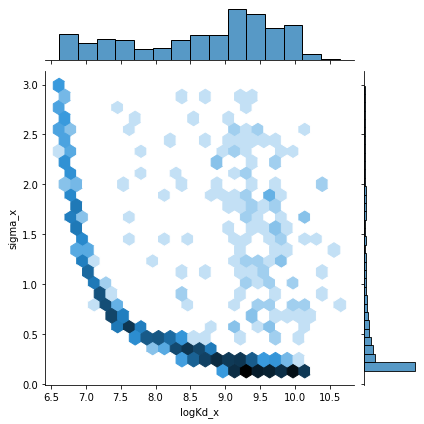

In [70]:
#H9 rep1
from scipy.stats import pearsonr
h9_all_test = h9_all[['logKd_x', 'sigma_x']].copy()
h9_all_test.dropna(inplace=True)
h9_filt_test = h9_all_test.loc[(h9_all_test['sigma_x'] <= 3)]
fig1=sns.jointplot(x='logKd_x', y='sigma_x', data=h9_filt_test, kind='hex', bins='log')

In [71]:
h9x_adj = h9x.copy()
boolean_condition = (h9x_adj.logKd < 8) & (h9x_adj.sigma > 1)
column_name = "logKd"
new_value = 7
h9x_adj.loc[boolean_condition, column_name] = new_value
boolean_condition = (h9x_adj.logKd < 7)
h9x_adj.loc[boolean_condition, column_name] = new_value
print(h9x['logKd'].mean(),h9x_adj['logKd'].mean())
h9x_adj

8.579238779763346 8.612138776185637


,variant,logKd,A,B,r2,sigma,c1,c2,c3,c4,...,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,00011001100,7.000000,1000.000000,312.729029,0.528571,3.022874,2.661451,2.736494,2.621080,2.549693,...,0.132915,0.154861,0.139221,0.127393,0.127937,0.158463,0.163722,0.160516,0.149089,0.120693
1,10000001100,7.000000,1000.000000,309.417717,0.702606,1.573876,2.736296,2.784054,2.612510,2.540506,...,0.133256,0.156532,0.139413,0.123378,0.125026,0.161199,0.168475,0.157094,0.147370,0.119836
2,01011001100,7.128510,1000.000000,312.363626,0.765567,0.920311,2.807706,2.843804,2.669158,2.624956,...,0.128726,0.147919,0.137824,0.124683,0.128418,0.160058,0.157909,0.159232,0.150160,0.122984
3,00001011100,7.000000,1000.000000,308.377808,0.710257,1.451464,2.740632,2.781860,2.634511,2.582100,...,0.134261,0.152927,0.143973,0.129742,0.131353,0.168240,0.155799,0.158319,0.151520,0.127572
4,00000001101,7.000000,1000.000000,307.785831,0.664901,2.899741,2.692691,2.711859,2.578539,2.562812,...,0.138348,0.154775,0.147198,0.129305,0.129677,0.163162,0.157358,0.159778,0.150154,0.126568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,00001110101,10.184828,1546.611526,231.451602,0.615618,2.545390,3.655670,3.414748,3.362200,2.653942,...,1.955277,1.538786,3.711566,1.977566,1.663421,1.357493,1.238713,1.415805,1.728972,1.080299
1994,11110110111,9.853725,12242.227436,277.421583,0.914772,1.620642,4.140037,3.917111,4.170264,4.100082,...,1.725734,2.056276,1.730598,1.553193,1.984272,1.453880,1.387165,1.096083,1.062597,0.987455
1995,11010110111,10.094964,16118.227995,292.424221,0.971329,1.446310,4.260692,4.201827,4.320936,4.100082,...,2.501043,2.056276,2.115758,1.563783,2.650244,1.714995,1.068719,1.265817,1.299303,1.704101
1996,11000110101,9.518555,14666.540192,206.982311,0.856009,1.544906,4.260692,4.304526,3.598515,4.254870,...,1.841814,2.136183,4.220143,1.807371,2.283066,1.914477,0.865919,1.415805,1.308389,2.407759


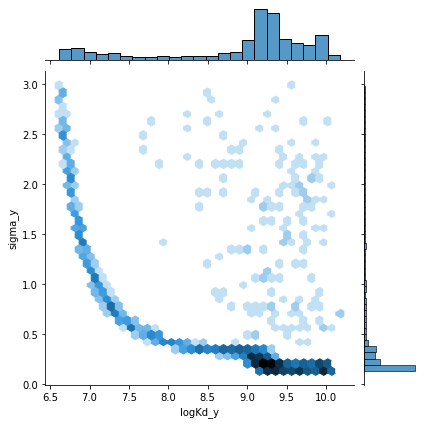

In [72]:
#H9 rep1
from scipy.stats import pearsonr
h9_all_test = h9_all[['logKd_y', 'sigma_y']].copy()
h9_all_test.dropna(inplace=True)
h9_filt_test = h9_all_test.loc[(h9_all_test['sigma_y'] <= 3)]
fig1=sns.jointplot(x='logKd_y', y='sigma_y', data=h9_filt_test, kind='hex', bins='log')

In [73]:
h9y_adj = h9y.copy()
boolean_condition = (h9y_adj.logKd < 8) & (h9y_adj.sigma > 1)
column_name = "logKd"
new_value = 7
h9y_adj.loc[boolean_condition, column_name] = new_value
boolean_condition = (h9y_adj.logKd < 7)
h9y_adj.loc[boolean_condition, column_name] = new_value
print(h9y['logKd'].mean(),h9y_adj['logKd'].mean())
h9y_adj

8.780150467584381 8.809799013515594


,variant,logKd,A,B,r2,sigma,c1,c2,c3,c4,...,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,11011111101,10.049260,16389.360363,254.152821,0.996040,0.157715,4.261384,4.255587,4.252155,4.192205,...,0.192520,0.189067,0.213729,0.200251,0.237825,0.194636,0.153782,0.119421,0.100973,0.107507
1,11000111101,10.072127,15816.873226,250.724062,0.996458,0.159011,4.224830,4.239427,4.232244,4.198411,...,0.193205,0.194693,0.214444,0.202807,0.236774,0.200209,0.155251,0.118373,0.108116,0.109364
2,11001111111,10.061155,16125.825153,266.596209,0.994713,0.167047,4.242338,4.247089,4.239267,4.208006,...,0.195991,0.198751,0.216198,0.206283,0.243022,0.201524,0.162879,0.129816,0.105500,0.112275
3,11001111110,10.074372,15402.692036,257.438860,0.996599,0.163426,4.222112,4.223673,4.224771,4.173016,...,0.197308,0.189971,0.215552,0.203173,0.241248,0.199265,0.161703,0.124269,0.105400,0.112139
4,11001100111,9.991867,16264.143785,257.961827,0.996988,0.163405,4.231727,4.253058,4.243731,4.203645,...,0.197719,0.195044,0.220992,0.202730,0.237785,0.191601,0.148981,0.123492,0.113258,0.109890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,01000010011,9.836165,1000.000000,255.532203,0.590896,2.273002,2.854418,3.162113,3.886660,3.080636,...,1.974099,1.188090,1.027682,1.119177,1.276563,0.891782,0.842406,2.445904,0.845358,0.807645
1983,00111010010,7.000000,1000.000000,341.916285,0.395491,4.287780,2.914201,2.920854,2.679139,2.690279,...,0.682910,0.824277,0.830156,0.838656,1.347251,1.142634,1.426459,2.445904,0.779695,0.628258
1984,00110010000,8.772275,1000.000000,281.636190,0.927904,2.189533,3.108462,2.951066,3.176100,2.919177,...,1.219339,0.899002,0.837603,0.729110,0.806260,0.648517,1.138489,2.445904,0.928315,0.731579
1985,00101010001,7.000000,1000.000000,403.491764,0.026166,613.791338,2.577850,3.136599,2.583004,2.987629,...,1.060742,1.243699,1.211719,1.067270,1.114302,1.307504,1.237123,2.445904,1.095550,1.346865


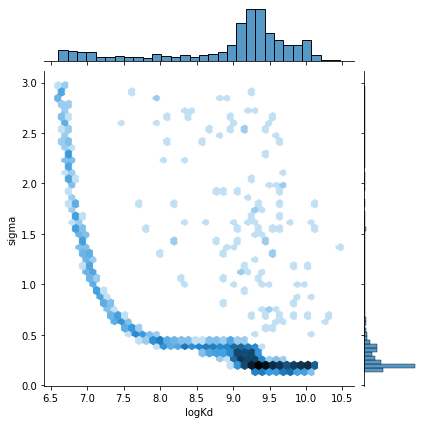

In [74]:
#H9 rep1
from scipy.stats import pearsonr
h9_all_test = h9_all[['logKd', 'sigma']].copy()
h9_all_test.dropna(inplace=True)
h9_filt_test = h9_all_test.loc[(h9_all_test['sigma'] <= 3)]
fig1=sns.jointplot(x='logKd', y='sigma', data=h9_filt_test, kind='hex', bins='log')

In [76]:
h9z_adj = h9z.copy()
boolean_condition = (h9z_adj.logKd < 8) & (h9z_adj.sigma > 1)
column_name = "logKd"
new_value = 7
h9z_adj.loc[boolean_condition, column_name] = new_value
boolean_condition = (h9z_adj.logKd < 7)
h9z_adj.loc[boolean_condition, column_name] = new_value
print(h9z['logKd'].mean(),h9z_adj['logKd'].mean())
h9z_adj

8.629985846076092 8.711012010616699


,variant,logKd,A,B,r2,sigma,c1,c2,c3,c4,...,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,01010100111,9.680783,9040.965995,252.041127,0.980345,0.135151,4.037214,3.925259,4.076999,4.001007,...,0.159436,0.137610,0.140588,0.123365,0.120472,0.111235,0.076625,0.086820,0.136933,0.148681
1,01000100110,9.681692,8857.954381,251.344155,0.982256,0.142702,3.982292,3.947946,4.047284,3.979272,...,0.164277,0.140125,0.152496,0.136642,0.131903,0.112069,0.081816,0.094194,0.153099,0.167123
2,01011111101,9.765166,9680.636329,235.018668,0.982232,0.139724,4.091605,3.991258,4.062582,3.998100,...,0.163244,0.135691,0.152378,0.139624,0.131308,0.117902,0.087227,0.094928,0.146062,0.192773
3,01010111101,9.727950,8888.007583,241.833349,0.987613,0.142579,4.002891,3.957062,4.044748,3.967735,...,0.163003,0.136222,0.145752,0.134707,0.131990,0.114249,0.083362,0.099201,0.149720,0.203360
4,01000100111,9.760233,9482.659864,248.166362,0.978277,0.140616,4.074646,3.957398,4.099651,4.004945,...,0.166566,0.140756,0.149447,0.132058,0.128860,0.115908,0.089375,0.091018,0.144936,0.165036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,00100010001,7.000000,1000.000000,298.647131,0.384238,3.663536,3.064498,2.774539,3.232048,2.565940,...,1.246493,0.612529,0.728624,3.014719,1.004155,0.475778,1.097672,0.644203,1.211679,0.622859
1952,10100010010,8.824785,1000.000000,238.980223,0.555020,2.814760,2.858629,2.577126,3.161014,3.440346,...,1.219858,1.741312,1.235219,1.226808,1.413594,0.662728,1.225845,1.220181,1.194744,1.195263
1953,10010010010,7.000000,5696.448798,376.816033,0.808056,5.005420,3.670070,3.240504,2.960093,2.963532,...,1.208843,1.349832,1.766603,2.019277,1.363863,1.363427,1.413877,1.407532,2.415927,1.673582
1954,00001010001,7.000000,1000.000000,297.684211,-0.283679,9.526935,2.498787,2.940528,2.534889,2.661272,...,1.042787,1.104124,0.934330,2.135536,1.392216,0.698418,1.413877,0.817517,1.084865,0.797534


### the h1/9 data just needs Kd < 7 and Kd < 8 & sigma > 1 replaced with 7

### Filtering out poor fits & large error

In [78]:
#h1
h1a_adj_f = h1a_adj.loc[((h1a_adj['logKd'] > 7) & (h1a_adj['sigma'] <= 1) & (h1a_adj['r2'] >= 0.8))|(h1a_adj['logKd'] <= 7)]
h1b_adj_f = h1b_adj.loc[((h1b_adj['logKd'] > 7)  & (h1b_adj['sigma'] <= 1) & (h1b_adj['r2'] >= 0.8))|(h1b_adj['logKd'] <= 7)]
h1c_adj_f = h1c_adj.loc[((h1c_adj['logKd'] > 7)  & (h1c_adj['sigma'] <= 1) & (h1c_adj['r2'] >= 0.8))|(h1c_adj['logKd'] <= 7)]
print(h1a_adj_f.shape[0],h1b_adj_f.shape[0],h1c_adj_f.shape[0])
#h1
h9x_adj_f = h9x_adj.loc[((h9x_adj['logKd'] > 7) & (h9x_adj['sigma'] <= 1) & (h9x_adj['r2'] >= 0.8))|(h9x_adj['logKd'] <= 7)]
h9y_adj_f = h9y_adj.loc[((h9y_adj['logKd'] > 7)  & (h9y_adj['sigma'] <= 1) & (h9y_adj['r2'] >= 0.8))|(h9y_adj['logKd'] <= 7)]
h9z_adj_f = h9z_adj.loc[((h9z_adj['logKd'] > 7)  & (h9z_adj['sigma'] <= 1) & (h9z_adj['r2'] >= 0.8))|(h9z_adj['logKd'] <= 7)]
print(h9x_adj_f.shape[0],h9y_adj_f.shape[0],h9z_adj_f.shape[0])

1887 1844 1810
1773 1650 1675


### Merging

In [79]:
#H1
h1_all_adj_f = pd.DataFrame()
h1_all_adj_f = pd.merge(h1a_adj_f, h1b_adj_f, on='variant',how='outer')
h1_all_adj_f = pd.merge(h1_all_adj_f, h1c_adj_f, on='variant',how='outer')
h1_all_adj_f

,variant,logKd_x,A_x,B_x,r2_x,sigma_x,c1_x,c2_x,c3_x,c4_x,...,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,01010100111,9.430292,7973.643995,126.477890,0.996464,0.112316,3.921994,3.900830,3.894349,3.826724,...,0.144279,0.137131,0.140434,0.133784,0.206543,0.084692,0.139400,0.164288,0.127477,0.116066
1,01011110011,9.404493,9093.648484,119.911437,0.994894,0.107711,3.990761,3.947351,3.941244,3.850347,...,0.141657,0.133098,0.134514,0.126476,0.216968,0.080003,0.139368,0.165027,0.129015,0.117578
2,01010100101,9.064914,4190.480954,140.096739,0.992926,0.160647,3.702715,3.605547,3.622152,3.432519,...,0.149961,0.139809,0.143139,0.144965,0.276069,0.123712,0.183237,0.168497,0.128991,0.117537
3,01000100110,9.320260,6032.868392,131.443068,0.996451,0.126341,3.784176,3.809467,3.794822,3.664262,...,0.159520,0.152769,0.144537,0.134181,0.272939,0.098322,0.169329,0.175347,0.132254,0.119550
4,01001100010,8.449593,2171.369103,153.109988,0.991204,0.272799,3.383619,3.295613,3.267411,2.970811,...,0.171102,0.160593,0.163950,0.169996,0.187447,0.163056,0.184246,0.169052,0.130403,0.118732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,01101000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.179027,0.167720,0.161743,0.224082,0.189635,0.169849,0.194899,0.203949,0.139414,0.127779
1899,01001000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.172880,0.165323,0.161519,0.219233,0.182762,0.169365,0.194333,0.183201,0.138044,0.125959
1900,01000000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.197657,0.178572,0.177415,0.268513,0.207360,0.176873,0.205536,0.214306,0.146600,0.141335
1901,00001010001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.829170,1.776048,2.054738,2.227833,1.656346,1.309981,1.249470,2.341690,0.731717,1.305008


In [80]:
#H9
h9_all_adj_f = pd.DataFrame()
h9_all_adj_f = pd.merge(h9x_adj_f, h9y_adj_f, on='variant',how='outer')
h9_all_adj_f = pd.merge(h9_all_adj_f, h9z_adj_f, on='variant',how='outer')
h9_all_adj_f

,variant,logKd_x,A_x,B_x,r2_x,sigma_x,c1_x,c2_x,c3_x,c4_x,...,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12
0,00011001100,7.0,1000.0,312.729029,0.528571,3.022874,2.661451,2.736494,2.621080,2.549693,...,0.132029,0.127954,0.140962,0.169678,0.151201,0.129247,0.130148,0.128280,0.150449,0.140079
1,10000001100,7.0,1000.0,309.417717,0.702606,1.573876,2.736296,2.784054,2.612510,2.540506,...,0.143356,0.127081,0.147992,0.170952,0.146599,0.134947,0.128916,0.132023,0.138816,0.168206
2,00001011100,7.0,1000.0,308.377808,0.710257,1.451464,2.740632,2.781860,2.634511,2.582100,...,0.124072,0.124440,0.127882,0.167453,0.162026,0.125798,0.128289,0.122296,0.155133,0.119199
3,00000001101,7.0,1000.0,307.785831,0.664901,2.899741,2.692691,2.711859,2.578539,2.562812,...,0.131865,0.126998,0.141095,0.166387,0.146804,0.131839,0.134460,0.130181,0.143411,0.136763
4,00100001101,7.0,1000.0,310.829672,0.632349,2.433953,2.698309,2.749491,2.587702,2.544296,...,0.136857,0.131520,0.148306,0.164343,0.147551,0.131962,0.131797,0.133406,0.161215,0.148537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,10101001010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.162806,0.132376,0.168541,0.207199,0.170117,0.140117,0.141600,0.148899,0.172707,0.199179
1865,01101001100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.150374,0.132113,0.152889,0.192240,0.170084,0.132248,0.139709,0.140831,0.155328,0.160985
1866,01100001001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.156153,0.147281,0.161252,0.189638,0.177604,0.136492,0.153518,0.150013,0.213232,0.159362
1867,10001010001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.863269,0.802518,0.691155,1.561825,0.922944,0.740936,0.821851,0.957290,1.397698,0.724960


## calculate mean and propagate error of replicates

In [81]:
h1_sm = h1_all_adj_f[['variant','logKd_x','logKd_y','logKd']].copy()
h1_sm['mean'] = h1_sm.mean(axis=1)
h1_sm['sem'] = h1_sm.sem(axis=1)
h1_sm.rename(columns={"logKd_x": "repa", "logKd_y": "repb", "logKd": "repc","mean": "h1_mean", "sem": "h1_sem"},inplace=True)
h1_sm.to_csv('kd_processed/20210323_h1_avg_adj_f.csv', index=False)

In [82]:
h9_sm = h9_all_adj_f[['variant','logKd_x','logKd_y','logKd']].copy()
h9_sm['mean'] = h9_sm.mean(axis=1)
h9_sm['sem'] = h9_sm.sem(axis=1)
h9_sm.rename(columns={"logKd_x": "repx", "logKd_y": "repy", "logKd": "repz","mean": "h9_mean", "sem": "h9_sem"},inplace=True)
h9_sm.to_csv('kd_processed/20210323_h9_avg_adj_f.csv', index=False)

In [83]:
h1_s = h1_all[['variant','logKd_x','logKd_y','logKd']].copy()
h1_s['mean'] = h1_s.mean(axis=1)
h1_s['sem'] = h1_s.sem(axis=1)
h1_s.rename(columns={"logKd_x": "repa", "logKd_y": "repb", "logKd": "repc","mean": "h1_mean", "sem": "h1_sem"},inplace=True)
h1_s.to_csv('kd_processed/20210323_h1_avg_unf.csv', index=False)

In [84]:
h9_s = h9_all[['variant','logKd_x','logKd_y','logKd']].copy()
h9_s['mean'] = h9_s.mean(axis=1)
h9_s['sem'] = h9_s.sem(axis=1)
h9_s.rename(columns={"logKd_x": "repx", "logKd_y": "repy", "logKd": "repz","mean": "h9_mean", "sem": "h9_sem"},inplace=True)
h9_s.to_csv('kd_processed/20210323_h9_avg_unf.csv', index=False)

## merge all antigens

In [85]:
#merge all antigens
HA_all = pd.DataFrame()
HA_all = pd.merge(h1_sm, h9_sm, on='variant',how='outer')

In [86]:
#define categories based on mutation position
def find_pos_1(variant):
    pos = [mut for mut in variant]
    if pos[0] == "1":
        return 1
    else:
        return 0
def find_pos_2(variant):
    pos = [mut for mut in variant]
    if pos[1] == "1":
        return 1
    else:
        return 0
def find_pos_3(variant):
    pos = [mut for mut in variant]
    if pos[2] == "1":
        return 1
    else:
        return 0
def find_pos_4(variant):
    pos = [mut for mut in variant]
    if pos[3] == "1":
        return 1
    else:
        return 0
def find_pos_5(variant):
    pos = [mut for mut in variant]
    if pos[4] == "1":
        return 1
    else:
        return 0
def find_pos_6(variant):
    pos = [mut for mut in variant]
    if pos[5] == "1":
        return 1
    else:
        return 0
def find_pos_7(variant):
    pos = [mut for mut in variant]
    if pos[6] == "1":
        return 1
    else:
        return 0
def find_pos_8(variant):
    pos = [mut for mut in variant]
    if pos[7] == "1":
        return 1
    else:
        return 0
def find_pos_9(variant):
    pos = [mut for mut in variant]
    if pos[8] == "1":
        return 1
    else:
        return 0
def find_pos_10(variant):
    pos = [mut for mut in variant]
    if pos[9 ] == "1":
        return 1
    else:
        return 0
def find_pos_11(variant):
    pos = [mut for mut in variant]
    if pos[10] == "1":
        return 1
    else:
        return 0

HA_all['pos1'] = HA_all['variant'].apply(find_pos_1)
HA_all['pos2'] = HA_all['variant'].apply(find_pos_2)
HA_all['pos3'] = HA_all['variant'].apply(find_pos_3)
HA_all['pos4'] = HA_all['variant'].apply(find_pos_4)
HA_all['pos5'] = HA_all['variant'].apply(find_pos_5)
HA_all['pos6'] = HA_all['variant'].apply(find_pos_6)
HA_all['pos7'] = HA_all['variant'].apply(find_pos_7)
HA_all['pos8'] = HA_all['variant'].apply(find_pos_8)
HA_all['pos9'] = HA_all['variant'].apply(find_pos_9)
HA_all['pos10'] = HA_all['variant'].apply(find_pos_10)
HA_all['pos11'] = HA_all['variant'].apply(find_pos_11)

In [87]:
#add a column with the number of mutations and save the file
def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

HA_all['som_mut'] = HA_all['variant'].apply(sum_digits)
HA_all.to_csv('kd_processed/20210323_6261_HA_adj_filt_merg.csv', index=False)

## unfiltered, unpinned data

In [89]:
#merge all antigens
HA_all_unf = pd.DataFrame()
HA_all_unf = pd.merge(h1_s, h9_s, on='variant',how='outer')

#define categories based on mutation position
HA_all_unf['pos1'] = HA_all_unf['variant'].apply(find_pos_1)
HA_all_unf['pos2'] = HA_all_unf['variant'].apply(find_pos_2)
HA_all_unf['pos3'] = HA_all_unf['variant'].apply(find_pos_3)
HA_all_unf['pos4'] = HA_all_unf['variant'].apply(find_pos_4)
HA_all_unf['pos5'] = HA_all_unf['variant'].apply(find_pos_5)
HA_all_unf['pos6'] = HA_all_unf['variant'].apply(find_pos_6)
HA_all_unf['pos7'] = HA_all_unf['variant'].apply(find_pos_7)
HA_all_unf['pos8'] = HA_all_unf['variant'].apply(find_pos_8)
HA_all_unf['pos9'] = HA_all_unf['variant'].apply(find_pos_9)
HA_all_unf['pos10'] = HA_all_unf['variant'].apply(find_pos_10)
HA_all_unf['pos11'] = HA_all_unf['variant'].apply(find_pos_11)

#add a column with the number of mutations and save the file
def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

HA_all_unf['som_mut'] = HA_all_unf['variant'].apply(sum_digits)
HA_all_unf.to_csv('kd_processed/20210323_6261_HA_unadj_unfilt_merg.csv', index=False)

## filtered, but not pinned (unless below boundary) data

In [91]:
#merge all antigens
HA_all_fil = pd.DataFrame()
HA_all_fil = pd.merge(h1_filt_merg_sm, h9_filt_merg_sm, on='variant',how='outer')

In [92]:
#define categories based on mutation position
HA_all_fil['pos1'] = HA_all_fil['variant'].apply(find_pos_1)
HA_all_fil['pos2'] = HA_all_fil['variant'].apply(find_pos_2)
HA_all_fil['pos3'] = HA_all_fil['variant'].apply(find_pos_3)
HA_all_fil['pos4'] = HA_all_fil['variant'].apply(find_pos_4)
HA_all_fil['pos5'] = HA_all_fil['variant'].apply(find_pos_5)
HA_all_fil['pos6'] = HA_all_fil['variant'].apply(find_pos_6)
HA_all_fil['pos7'] = HA_all_fil['variant'].apply(find_pos_7)
HA_all_fil['pos8'] = HA_all_fil['variant'].apply(find_pos_8)
HA_all_fil['pos9'] = HA_all_fil['variant'].apply(find_pos_9)
HA_all_fil['pos10'] = HA_all_fil['variant'].apply(find_pos_10)
HA_all_fil['pos11'] = HA_all_fil['variant'].apply(find_pos_11)

In [93]:
#add a column with the number of mutations and save the file
def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

HA_all_fil['som_mut'] = HA_all_fil['variant'].apply(sum_digits)
HA_all_fil.to_csv('kd_processed/20210323_6261_HA_unadj_fil_merg.csv', index=False)